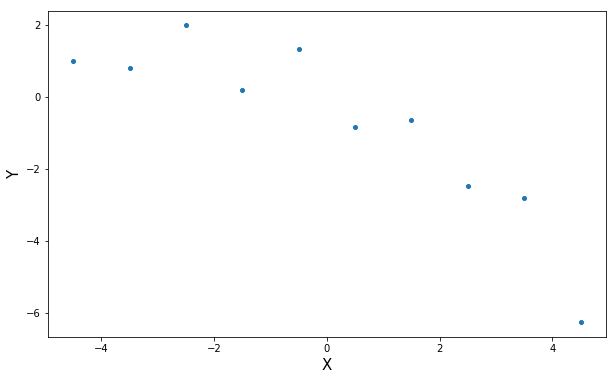

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 10 
x = np.linspace(-4.5, 4.5, 10).reshape(-1,1)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701,
             -2.8122, -6.2512]).reshape(-1, 1)

plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', markersize=4, label='Data')
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.show()

[[-0.7774    ]
 [-0.71070424]]


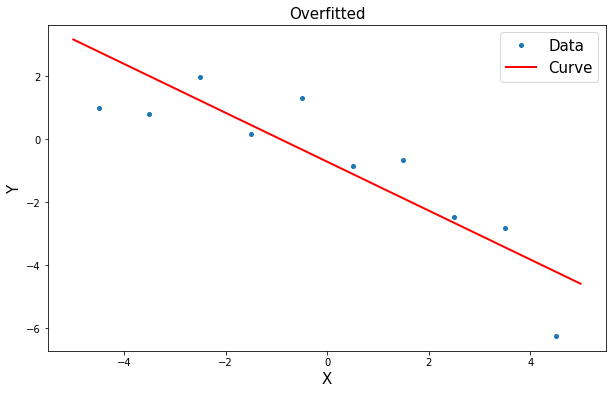

In [31]:
A = np.hstack([x**0, x])
A = np.asmatrix(A)

theta = (A.T*A).I*A.T*y
print(theta)

xp = np.arange(-5, 5, 0.01).reshape(-1, 1)
yp = theta[0,0]*xp + theta[1,0]

plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', markersize=4, label='Data')
plt.plot(xp, yp, 'r', linewidth=2, label='Curve')
plt.title('Overfitted', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.legend(fontsize=15)
plt.show()

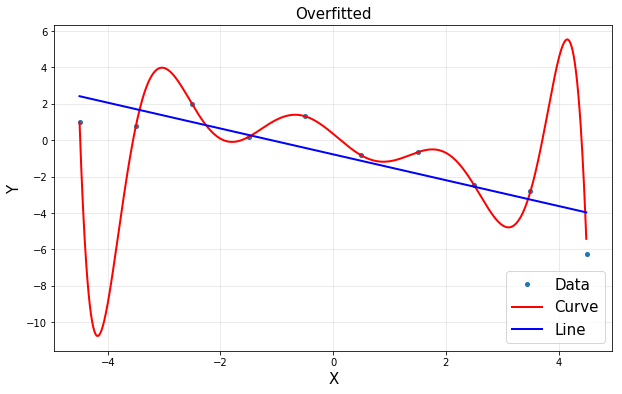

In [56]:
# Overfitted

A = np.hstack([x**0, x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9])
A = np.asmatrix(A)
A1 = np.hstack([x**0, x])
A1 = np.asmatrix(A1)

theta = (A.T*A).I*A.T*y
theta1 = (A1.T*A1).I*A1.T*y

xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)
# xp = np.linspace(-4.5, 4.5, 5000)
"""yp = (theta[9,0]*xp**9 + theta[8,0]*xp**8 + theta[7,0]*xp**7 + theta[6,0]*xp**6
    + theta[5,0]*xp**5 + theta[4,0]*xp**4 + theta[3,0]*xp**3 + theta[2,0]*xp**2
    + theta[1,0]*xp + theta[0,0])"""
yp = theta[9,0]*xp**9 + theta[8,0]*xp**8 + theta[7,0]*xp**7 + theta[6,0]*xp**6 \
    + theta[5,0]*xp**5 + theta[4,0]*xp**4 + theta[3,0]*xp**3 + theta[2,0]*xp**2 \
    + theta[1,0]*xp + theta[0,0]
yp1 = theta1[1,0]*xp + theta1[0,0] 

plt.figure(figsize=(10,6))
plt.plot(x, y, 'o', markersize=4, label='Data')
plt.plot(xp, yp, 'r', linewidth=2, label='Curve')
plt.plot(xp, yp1, 'b', linewidth=2, label='Line')
plt.title('Overfitted', fontsize=15)
plt.xlabel('X', fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.grid(alpha=0.3)
# plt.ylim(-10, 6)
plt.legend(fontsize=15)
plt.show()

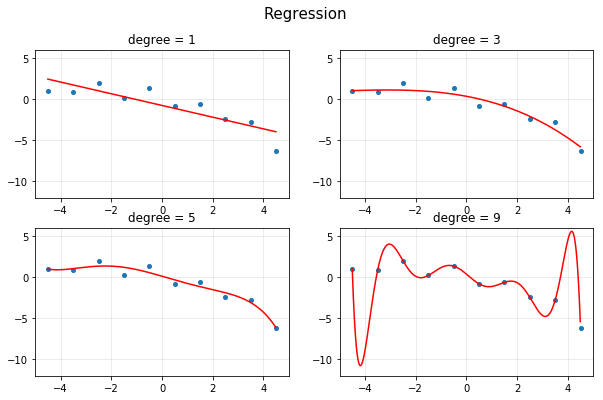

[3.711165965503988, 1.9748851859194505, 1.7286250649247936, 4.876435045206212e-10]


In [57]:
#RSS
d = [1, 3, 5, 9]
RSS = []

plt.figure(figsize=(10,6))
plt.suptitle('Regression', fontsize=15) # figure 중앙제목

for k in range(4):   # k 0 ~ 3 까지 반복
    A = np.hstack([x**i for i in range(d[k]+1)]) # k = 1 d[k]+1= 4 i= 0 ~ 3
    polybasis = np.hstack([xp**i for i in range(d[k]+1)])
    
    A = np.asmatrix(A)
    polybasis = np.asmatrix(polybasis)
    
    theta = (A.T*A).I*A.T*y
    yp = polybasis*theta  # xp**0*theta[0,0] + xp**1*theta[1,0] + ...
    
    RSS.append(np.linalg.norm(y - A*theta, 2))
    
    plt.subplot(2, 2, k+1)
    plt.plot(x, y, 'o', markersize=4)
    plt.plot(xp, yp, 'r')
    plt.axis([-5, 5, -12, 6])  # x min, x max, y min, y max
    plt.title('degree = {}'.format(d[k]))
    plt.grid(alpha=0.3)
    
plt.show()
print(RSS)

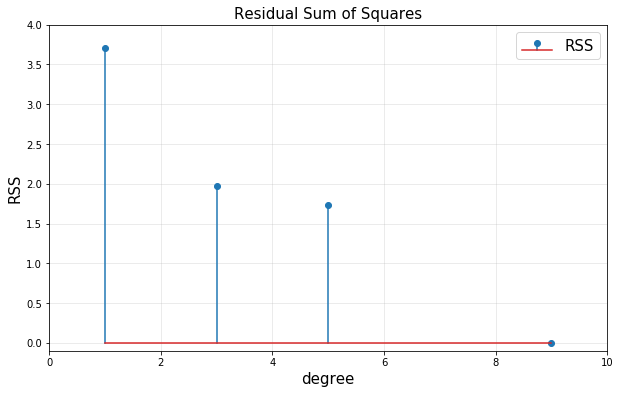

In [60]:
plt.figure(figsize=(10,6))
plt.stem(d, RSS, label='RSS')
plt.title('Residual Sum of Squares', fontsize=15)
plt.xlabel('degree', fontsize=15)
plt.ylabel('RSS', fontsize=15)
plt.axis([0, 10, -0.1, 4.0])
plt.legend(fontsize=15)
plt.grid(alpha=0.3)
plt.show()